<a href="https://colab.research.google.com/github/uceku95/House-price-prediction/blob/main/Dspart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOUSE PRICE PREDICTION**

 **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Reading the dataset**

In [ ]:
df = pd.read_excel("/content/DS - Assignment Part 1 data set.xlsx")

**"df.head()" for showing first 5 elements of the dataset**

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


**"df.tail()" for showing last 5 elements of the dataset**

In [ ]:
df.tail()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


**"df.shape" for showing number of rows and columns in the dataset**

In [ ]:
df.shape

(414, 9)

**Data Visualization**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


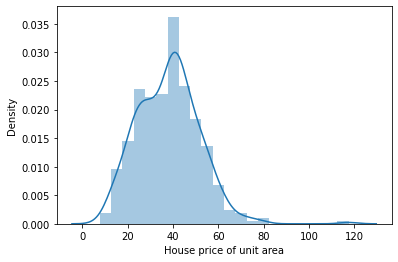

In [ ]:
sns.distplot(df['House price of unit area'])

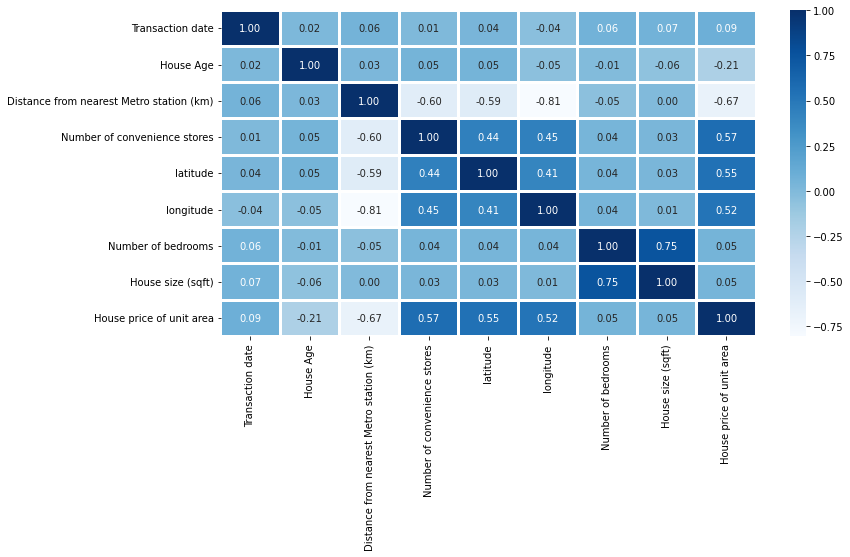

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap = 'Blues',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Data Cleaning**

In [ ]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
df.shape

(414, 9)

**Splitting the dataset for training and testing**

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

**ACCURACY AND MEAN SQUARED ERROR**                                         

Mean Square error measures the average of squares of errors that is the average squared difference beween the actual values and predicted values.  
                 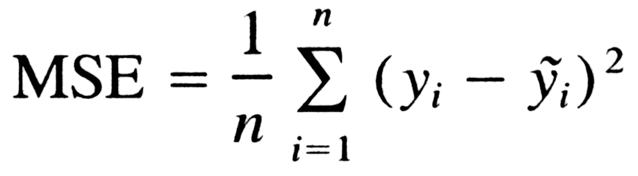

Finding the accuracy and prediction using **"Random Forest Regressor"**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
dt = RandomForestRegressor(criterion='absolute_error',n_jobs=-1, n_estimators=10,max_depth=6, min_samples_leaf=1, random_state=3)
# fit the random forest to training data
dt.fit(x_train,y_train)
y_predicted = dt.predict(x_test)
accuracy = dt.score(x_test,y_test)
MSE_score = MSE(y_test,y_predicted)
print("Training Accuracy:",dt.score(x_train,y_train)*100)
print("Testing Accuracy:",accuracy*100)
print("Mean Squared Error",MSE_score.mean())

Training Accuracy: 86.64283841821532
Testing Accuracy: 71.63837122447961
Mean Squared Error 49.116335240963856


Finding the accuracy and prediction using **"Linear Regression"**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predicted = lr.predict(x_test)
accuracy = lr.score(x_test,y_test)
MSE_score = MSE(y_test,y_predicted)
print("Training Accuracy:",lr.score(x_train,y_train)*100)
print("Testing Accuracy:",accuracy*100)
print("Mean Squared Error",MSE_score.mean())


Training Accuracy: 58.627375236274744
Testing Accuracy: 56.08482725005417
Mean Squared Error 76.05177981924997


Finding the accuracy and prediction using **"Support Vector Regressor"** of **"Support Vector Machine"**

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
s=svm.SVR()
s.fit(x_train,y_train)
y_predicted = s.predict(x_test)
accuracy = s.score(x_test,y_test)
MSE_score = MSE(y_test,y_predicted)
print("Training Accuracy:",lr.score(x_train,y_train)*100)
print("Testing Accuracy:",accuracy*100)
print("Mean Squared Error",MSE_score.mean())


Training Accuracy: 58.627375236274744
Testing Accuracy: 41.71426352163794
Mean Squared Error 100.93855311683103


**CONCLUSION**

From the above model, we can conclude that Random forest regressor gives the best accuracy which 86% and mean squared error is also less which is 49% when compared to SVR and Linear regression.

